**NOTE: Niniejszy kod został zaprojektowany przez studenta WSZiB: Łukasza Gawła**

#**Załadowanie wybranej bazy danych do Colaba**

In [1]:
from google.colab import files;
Upload = files.upload();

Saving data.csv to data.csv


#**Zaimportowanie wykorzystywanych bibliotek**

In [68]:
import pandas as Panda;
import matplotlib.pyplot as Plot;
from sklearn.preprocessing import RobustScaler;
from sklearn.mixture import GaussianMixture;
from sklearn.cluster import KMeans;
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score;

# **Pre-processing załadowanych danych**

In [93]:
Read_Data = Panda.read_csv('data.csv', encoding='cp1252'); #Wczytanie danych z zaimportoanego pliku z encodingiem cp1252, gdyż utf-8 nie zadziałał.

print("Wejściowa liczba wierszy: ", len(Read_Data)); #Początkowa liczba wierszy: 541909

print("\nSprawdzenie typów danych w kolumnach");
print(Read_Data.dtypes);

#Sprawdzenie zużycia pamięci w MB
Memory_In_Bytes= Read_Data.memory_usage(deep=True);
Memory_In_MB= Memory_In_Bytes/ (1024**2);
Sum_Memory_In_MB= Memory_In_MB.sum();
print("\nZużycie pamięci w MB (orginał):\n", Memory_In_MB);
print(f"\nŁączne zużycie pamięci w MB (orginał): {Sum_Memory_In_MB:.2f}");

#Usunięcie nieużywanych kolumn: Description i InvoiceDate
Read_Data = Read_Data.drop(['Description', 'InvoiceDate'], axis=1);
print("\nObecna liczba wierszy w pliku data.csv, po usunięciu zbędnych kolumn: ", len(Read_Data));

#Porównanie obecnego zużycia pamięci do wartości sprzed usuniecia kolumn
Memory_In_Bytes= Read_Data.memory_usage(deep=True);
Memory_In_MB= Memory_In_Bytes/ (1024**2);
Sum_Memory_In_MB= Memory_In_MB.sum();
print("\nObecne zużycie pamięci w MB (usunięcie zbędnych kolumn):\n", Memory_In_MB);
print(f"\nObecne łączne zużycie pamięci w MB (usunięcie zbędnych kolumn): {Sum_Memory_In_MB:.2f}");

#============================= SPRAWDZENIE PUSTYCH WARTOŚCI + ANALIZA KOLUMNY "CustomerId" =============================

print("\nSprawdzenie brakujących wartości w kolumnach");
print(Read_Data.isna().sum());

Read_Data= Read_Data.dropna(subset=["CustomerID"]); #Nadpisanie Read_Data, aby się pozbyć braków w kolumnie CustomerID
print("\nSprawdzenie, czy CustomerID zawiera brakujące wartości po usunięciu");
print(Read_Data['CustomerID'].isna().sum());

print("\nPonowne sprawdzenie czy występują brakujace wartości w kolumnach");
print(Read_Data.isna().sum());

print("\nLiczba wierszy po poprawkach w kolumnie CustomerID:", len(Read_Data)); #Obecny wynik: 406 829 records. Usuniętych zostało ok. 25% rekordów.

#Zmiana typu danych tej kolumny na int, aby pozbyć się końcówki ".0"
Read_Data['CustomerID'] = Read_Data['CustomerID'].astype(int);

print("\nWyświetlenie danych w CustomerID");
print("\n",Read_Data['CustomerID']);

#============================= ZMIANA TYPU DANYCH ANALIZOWANYCH KOLUMN =============================

print("\nPorównanie uniklanych wartości CustomerID do ilości wszystkich wierszy");
print("Liczba unikalnych CustomerID:", Read_Data['CustomerID'].nunique(), " Liczba wszystkich wierszy:", len(Read_Data));

print("\nPorównanie uniklanych wartości StockCode do ilości wszystkich wierszy");
print("Liczba unikalnych StockCode:", Read_Data['StockCode'].nunique(), " Liczba wszystkich wierszy:", len(Read_Data));

print("\nPorównanie uniklanych wartości InvoiceNo do ilości wszystkich wierszy");
print("Liczba unikalnych InvoiceNo:", Read_Data['InvoiceNo'].nunique(), " Liczba wszystkich wierszy:", len(Read_Data));

print("\nPorównanie uniklanych wartości Country do ilości wszystkich wierszy");
print("Liczba unikalnych Country:", Read_Data['Country'].nunique(), " Liczba wszystkich wierszy:", len(Read_Data));


#Zmiana typów kolumn
Read_Data['CustomerID'] = Read_Data['CustomerID'].astype('category');
Read_Data['StockCode'] = Read_Data['StockCode'].astype('category');
Read_Data['InvoiceNo'] = Read_Data['InvoiceNo'].astype('category');
Read_Data['Country'] = Read_Data['Country'].astype('category');

print("\nWykaz obecnie wykorzystywanych typów danych:\n",Read_Data.dtypes);

#============================= PONOWNE PORÓWNANIE PAMIĘCI =============================

#Porównanie obecnego zużycia pamięci do wartości sprzed zmian w typach danych wykorzystywanych kolumn
Memory_In_Bytes= Read_Data.memory_usage(deep=True);
Memory_In_MB= Memory_In_Bytes/ (1024**2);
Sum_Memory_In_MB= Memory_In_MB.sum();
print("\nObecne zużycie pamięci w MB (zmiana typu danych analizowanych kolumn):\n", Memory_In_MB);
print(f"\nObecne łączne zużycie pamięci w MB (zmiana typu danych analizowanych kolumn): {Sum_Memory_In_MB:.2f}");

Wejściowa liczba wierszy:  541909

Sprawdzenie typów danych w kolumnach
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Zużycie pamięci w MB (orginał):
 Index           0.000126
InvoiceNo      32.567556
StockCode      32.086773
Description    43.156619
Quantity        4.134438
InvoiceDate    37.199766
UnitPrice       4.134438
CustomerID      4.134438
Country        36.370752
dtype: float64

Łączne zużycie pamięci w MB (orginał): 193.78

Obecna liczba wierszy w pliku data.csv, po usunięciu zbędnych kolumn:  541909

Obecne zużycie pamięci w MB (usunięcie zbędnych kolumn):
 Index          0.000126
InvoiceNo     32.567556
StockCode     32.086773
Quantity       4.134438
UnitPrice      4.134438
CustomerID     4.134438
Country       36.370752
dtype: float64

Obecne łączne zużycie pamięci w MB (usunięcie zbędnych kolumn): 113.43

Sprawdzenie bra

# **Analiza kolumny "InvoiceNo"**

In [94]:
print("Sprawdzenie wartości w kolumnie InvoiceNo");
print(Read_Data['InvoiceNo'].sort_values());

print("\nWyświetlenie InvoiceNo = 536365");
print(Read_Data.loc[0]);

print("\n",Read_Data.loc[1]);

print("\nSprawdzenie czy duplikaty InvoiceNo są z powodu różnych StockCode'ów");
Check_Stock= Read_Data.groupby(['InvoiceNo', 'CustomerID'])['StockCode'].nunique();
Check_Stock= Check_Stock[Check_Stock>1];
print(Check_Stock);

Sprawdzenie wartości w kolumnie InvoiceNo
0          536365
1          536365
2          536365
3          536365
4          536365
           ...   
540448    C581490
541541    C581499
541715    C581568
541717    C581569
541716    C581569
Name: InvoiceNo, Length: 406829, dtype: category
Categories (22190, object): ['536365', '536366', '536367', '536368', ..., 'C581490', 'C581499',
                             'C581568', 'C581569']

Wyświetlenie InvoiceNo = 536365
InvoiceNo             536365
StockCode             85123A
Quantity                   6
UnitPrice               2.55
CustomerID             17850
Country       United Kingdom
Name: 0, dtype: object

 InvoiceNo             536365
StockCode              71053
Quantity                   6
UnitPrice               3.39
CustomerID             17850
Country       United Kingdom
Name: 1, dtype: object

Sprawdzenie czy duplikaty InvoiceNo są z powodu różnych StockCode'ów


<ipython-input-94-c80ad5589ae4>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Check_Stock= Read_Data.groupby(['InvoiceNo', 'CustomerID'])['StockCode'].nunique();


InvoiceNo  CustomerID
536365     17850          7
536366     17850          2
536367     13047         12
536368     13047          4
536370     12583         20
                         ..
C581465    15755          4
C581466    13883          5
C581468    13599          2
C581490    14397          2
C581569    17315          2
Name: StockCode, Length: 18756, dtype: int64


# **Analiza kolumny "Quantity"**

<ipython-input-95-b9fa2800de81>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Plot.tight_layout();


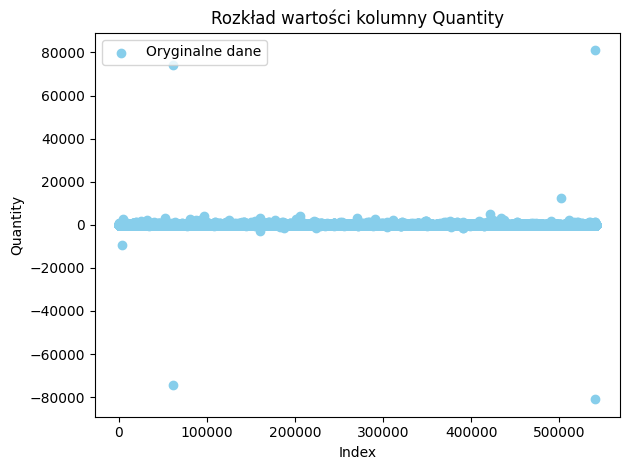

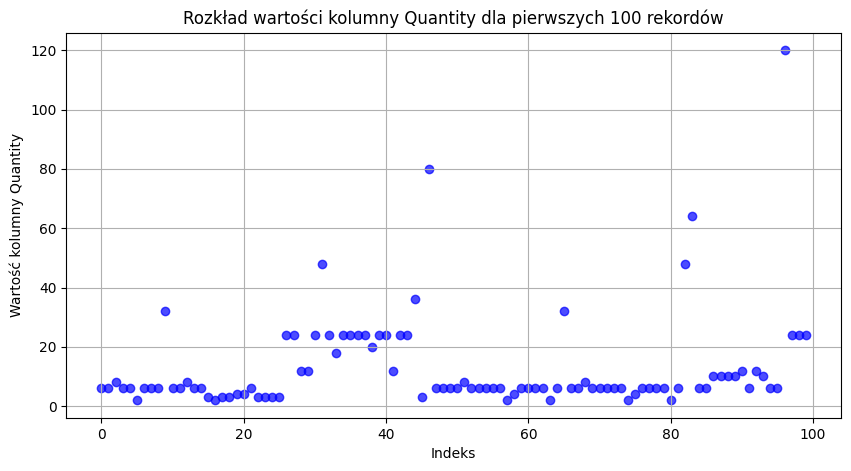


Podstawowe statystyki dla kolumny Quantity:
count    406829.000000
mean         12.061303
std         248.693370
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Liczba wierszy, w których 'Quantity' jest większe niż 0: 397924
Liczba wierszy, w których 'Quantity' jest równe 0: 0
Liczba wierszy, w których 'Quantity' jest mniejsze niż 0: 8905

Obliczanie IQR
Q1 = 2.0 , Q3 = 12.0 , IQR = 10.0

Wyznaczenie dolnej i górnej granicy

Dolna Granica: 0
Górna Granica: 27.0

Najmniejsza wartość dodatnia:  1

Sprawdzenie, czy dane znajdują się powyżej górnej granicy
       InvoiceNo StockCode  Quantity  UnitPrice CustomerID         Country
9         536367     84879        32       1.69      13047  United Kingdom
31        536370     10002        48       0.85      12583          France
44        536370     22492        36       0.65      12583          France
46        536371     22086        80     

<ipython-input-95-b9fa2800de81>:97: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Plot.tight_layout();
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


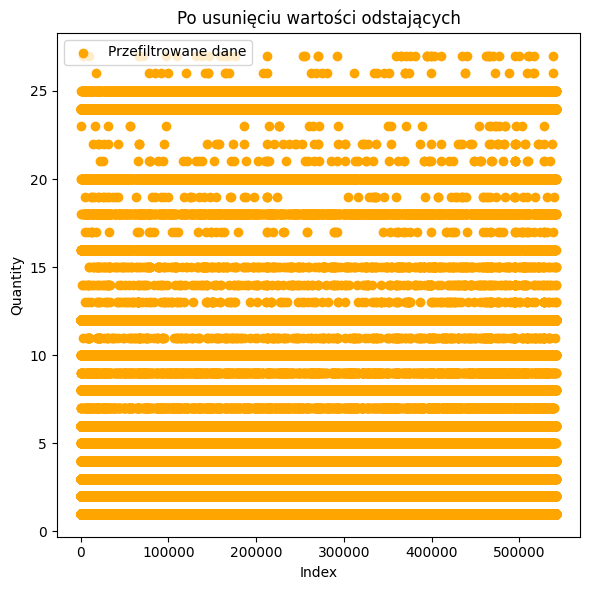

In [95]:
#Tworzenie kopii dla tabeli przed filtrowaniem
Read_Data_Copy = Read_Data.copy();

#============================= WYKRESY SPRZED USUNIĘCIA PUNKTÓW ODSTAJĄCYCH =============================

# Rozkład wartości kolumny Quantity
Plot.scatter(Read_Data_Copy.index, Read_Data_Copy['Quantity'], color='skyblue', label='Oryginalne dane');
Plot.title("Rozkład wartości kolumny Quantity");
Plot.xlabel("Index");
Plot.ylabel("Quantity");
Plot.legend();
Plot.tight_layout();
Plot.show();

print('\n');

# Utworzenie scatter plot dla pierwszych 100 rekordów
Plot.figure(figsize=(10, 5));
Plot.scatter(Read_Data_Copy.index[:100], Read_Data_Copy['Quantity'][:100], color='blue', alpha=0.7);

# Dodanie opisów osi + tytuł
Plot.xlabel("Indeks");
Plot.ylabel("Wartość kolumny Quantity");
Plot.title("Rozkład wartości kolumny Quantity dla pierwszych 100 rekordów");
Plot.grid(True);

# Wyświetlenie wykresu
Plot.show();

print("\nPodstawowe statystyki dla kolumny Quantity:");
statystyki= Read_Data['Quantity'].describe();
print(statystyki);

#Wynik
#Count (liczba wierszy niepustych, w tym wypadku liczba wierszy w Read_Data) = 406 829 records
#mean (średnia) = 12.061303
#std (odchylenie standardowe) = 248.693370
#min (minimalna wartość) = -80995.000000
#25% (Q1) = 2.000000
#50% (Q2) = 5.000000
#75% (Q3) = 12.000000
#max (maksymalna wartość) = 80995.000000

# Filtracja wierszy na podstawie ilości produktów
Count_Greater_Than_Zero = Read_Data[Read_Data['Quantity'] > 0].shape[0];
Count_Equal_To_Zero = Read_Data[Read_Data['Quantity'] == 0].shape[0];
Count_Lower_Than_Zero = Read_Data[Read_Data['Quantity'] < 0].shape[0];

# Wyświetlenie wyników
print(f"\nLiczba wierszy, w których 'Quantity' jest większe niż 0: {Count_Greater_Than_Zero}"); #Wynik = 397924
print(f"Liczba wierszy, w których 'Quantity' jest równe 0: {Count_Equal_To_Zero}"); #Wynik = 0
print(f"Liczba wierszy, w których 'Quantity' jest mniejsze niż 0: {Count_Lower_Than_Zero}"); #Wynik = 8905

#============================= OBLICZANIE IQR DO WYZNACZENIA GRANIC PRZED USUNIĘCIEM PUNKTÓW ODSTAJĄCYCH =============================

print("\nObliczanie IQR");
Q1 = statystyki.loc['25%'];
Q3 = statystyki.loc['75%'];
IQR = Q3 - Q1;
print("Q1 =", Q1, ", Q3 =", Q3, ", IQR =",IQR);

print("\nWyznaczenie dolnej i górnej granicy");
Lower_Bd = max(Q1 - 1.5 * IQR, 0); #Jeśli otrzymany wynik z wyrażenia Q1 - 1.5 * IQR jest ujemna, to dolna granica ma wartość 0.
Upper_Bd = Q3 + 1.5 * IQR;
print("\nDolna Granica:", Lower_Bd);
print("Górna Granica:", Upper_Bd);

#Sprawdzenie najmniejszej wartości dodatniej
Min_Value = 0;
Second_Min_Value= Read_Data.loc[Read_Data['Quantity'] > Min_Value, 'Quantity'].min();
print("\nNajmniejsza wartość dodatnia: ", Second_Min_Value); #Wynik równy 1.

print("\nSprawdzenie, czy dane znajdują się powyżej górnej granicy");
print(Read_Data[Read_Data['Quantity'] > Upper_Bd]);

print("\nSprawdzenie, czy dane znajdują się poniżej dolnej granicy");
print(Read_Data[Read_Data['Quantity'] < Lower_Bd]);

print("\nUsunięcie wartości odstających i wyświetlenie wyników");
Read_Data = Read_Data[(Read_Data['Quantity'] >= Lower_Bd) & (Read_Data['Quantity'] <= Upper_Bd)];
print(Read_Data);

print("\nIlość wierszy po usunięciu wartości odstających", len(Read_Data),"\n"); #Obecna pula dostępnych rekordów: 372268

#============================= WYKRES PO USUNIĘCIU PUNKTÓW ODSTAJĄCYCH =============================

# Rysowanie wykresu po usunięciu wartości odstających
Plot.figure(figsize=(6, 6));

# Wykres po usunięciu wartości odstających
Plot.scatter(Read_Data.index, Read_Data['Quantity'], color='orange', label='Przefiltrowane dane');
Plot.title("Po usunięciu wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("Quantity");
Plot.legend();

Plot.tight_layout();
Plot.show();

# **Analiza kolumny "UnitPrice"**

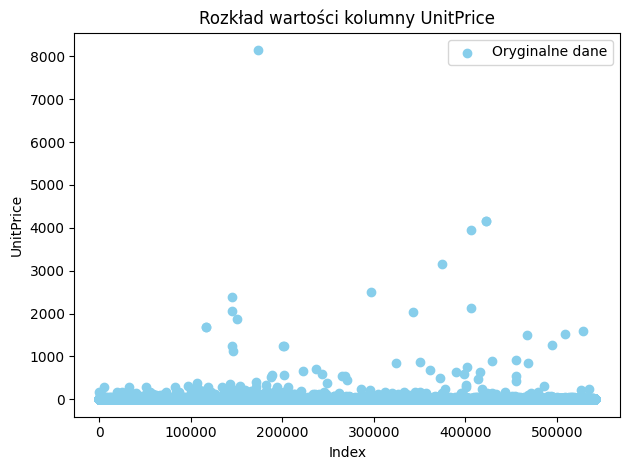

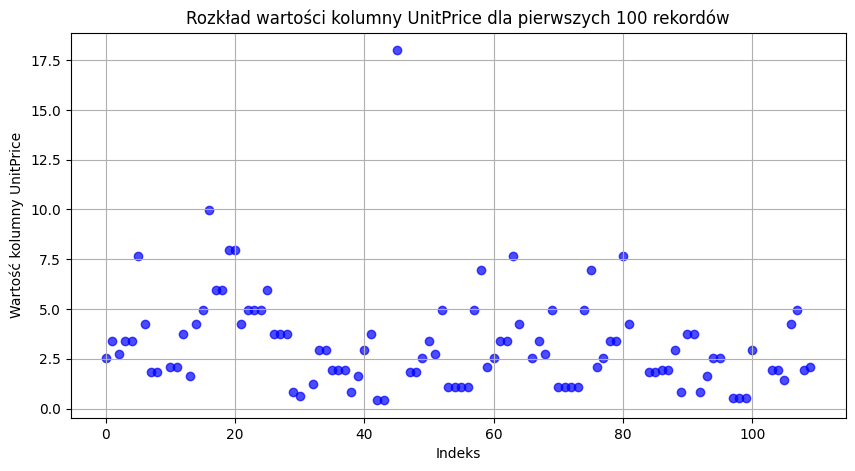


Podstawowe statystyki dla kolumny UnitPrice:
count    372268.000000
mean          3.228279
std          22.813309
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

Liczba wierszy, w których 'UnitPrice' jest większe niż 0: 372237
Liczba wierszy, w których 'UnitPrice' jest równe 0: 31
Liczba wierszy, w których 'UnitPrice' jest mniejsze niż 0: 0

Obliczanie IQR
Q1 = 1.25 , Q3 = 3.75 , IQR = 2.5

Wyznaczenie dolnej i górnej granicy

Dolna Granica: 0
Górna Granica: 7.5

Drugi najmniejszy wynik kolumny UnitPrice:  0.001

Liczebność wyniku UnitPrice= 0.001: 4

Wyświetlenie rekordów(UnitPrice= 0.001)
        InvoiceNo     StockCode  Quantity  UnitPrice CustomerID         Country
157195    550193          PADS         1      0.001      13952  United Kingdom
279045    561226          PADS         1      0.001      15618  United Kingdom
359871    568200          PADS         1      0.001      16198 

<ipython-input-96-a3277ce4e279>:108: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  Plot.tight_layout();
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


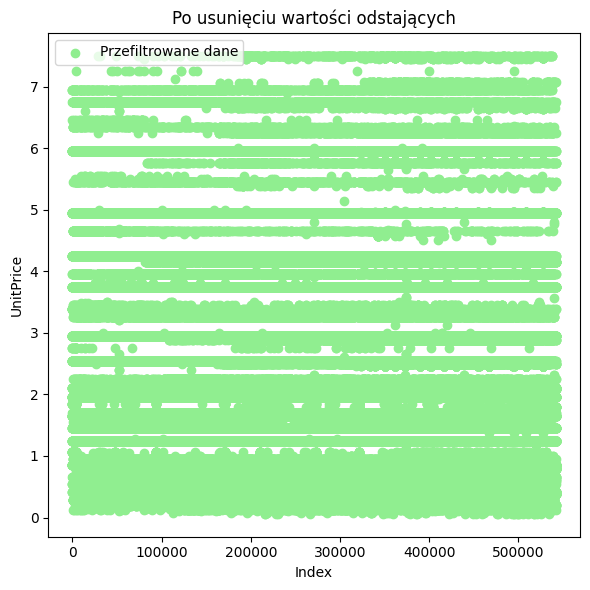

In [96]:
#Tworzenie kopii dla tabeli przed filtrowaniem
Read_Data_Copy_1 = Read_Data.copy();

#============================= WYKRESY SPRZED USUNIĘCIA PUNKTÓW ODSTAJĄCYCH =============================

# Rozkład wartości kolumny UnitPrice
Plot.scatter(Read_Data_Copy_1.index, Read_Data_Copy_1['UnitPrice'], color='skyblue', label='Oryginalne dane');
Plot.title("Rozkład wartości kolumny UnitPrice");
Plot.xlabel("Index");
Plot.ylabel("UnitPrice");
Plot.legend();
Plot.tight_layout();
Plot.show();

print('\n');

# Utworzenie scatter plot dla pierwszych 100 rekordów
Plot.figure(figsize=(10, 5));
Plot.scatter(Read_Data_Copy_1.index[:100], Read_Data_Copy_1['UnitPrice'][:100], color='blue', alpha=0.7);

# Dodanie opisów osi + tytuł
Plot.xlabel("Indeks");
Plot.ylabel("Wartość kolumny UnitPrice");
Plot.title("Rozkład wartości kolumny UnitPrice dla pierwszych 100 rekordów");
Plot.grid(True);

# Wyświetlenie wykresu
Plot.show();

print("\nPodstawowe statystyki dla kolumny UnitPrice:");
statystyki= Read_Data['UnitPrice'].describe();
print(statystyki);

#Wynik
#Count (liczba wierszy niepustych, w tym wypadku liczba wierszy w Read_Data) = 372 268 records
#mean (średnia) = 3.228279
#std (odchylenie standardowe) = 22.813309
#min (minimalna wartość) =  0.000000
#25% (Q1) = 1.250000
#50% (Q2) = 1.950000
#75% (Q3) = 3.750000
#max (maksymalna wartość) = 8142.750000

# Filtracja wierszy na podstawie dostępnych cen produktów
Count_Greater_Than_Zero = Read_Data[Read_Data['UnitPrice'] > 0].shape[0];
Count_Equal_To_Zero = Read_Data[Read_Data['UnitPrice'] == 0].shape[0];
Count_Lower_Than_Zero = Read_Data[Read_Data['UnitPrice'] < 0].shape[0];

# Wyświetlenie wyników
print(f"\nLiczba wierszy, w których 'UnitPrice' jest większe niż 0: {Count_Greater_Than_Zero}"); #Wynik = 372237
print(f"Liczba wierszy, w których 'UnitPrice' jest równe 0: {Count_Equal_To_Zero}"); #Wynik = 31
print(f"Liczba wierszy, w których 'UnitPrice' jest mniejsze niż 0: {Count_Lower_Than_Zero}"); #Wynik = 0

#============================= OBLICZANIE IQR DO WYZNACZENIA GRANIC PRZED USUNIĘCIEM PUNKTÓW ODSTAJĄCYCH =============================

print("\nObliczanie IQR");
Q1 = statystyki.loc['25%'];
Q3 = statystyki.loc['75%'];
IQR = Q3 - Q1;
print("Q1 =", Q1, ", Q3 =", Q3, ", IQR =",IQR);

print("\nWyznaczenie dolnej i górnej granicy");
Lower_Bd = max(Q1 - 1.5 * IQR, 0); #Jeśli otrzymany wynik z wyrażenia Q1 - 1.5 * IQR jest ujemna, to dolna granica ma wartość 0.
Upper_Bd = Q3 + 1.5 * IQR;
print("\nDolna Granica:", Lower_Bd);
print("Górna Granica:", Upper_Bd);

#Obliczenie drugiej najmniejszego wyniku
Min_Value = statystyki.loc['min'];
Second_Min_Value= Read_Data.loc[Read_Data['UnitPrice'] > Min_Value, 'UnitPrice'].min();
print("\nDrugi najmniejszy wynik kolumny UnitPrice: ",Second_Min_Value);

#Liczenie występowania drugiego wyniku kolumny Unitprie: 0.001
Count_Equal_To_Less_Than_1 = Read_Data[(Read_Data['UnitPrice'] >= Second_Min_Value) & (Read_Data['UnitPrice']<0.01)];
print("\nLiczebność wyniku UnitPrice= 0.001:",Count_Equal_To_Less_Than_1.shape[0]);

print("\nWyświetlenie rekordów(UnitPrice= 0.001)\n", Count_Equal_To_Less_Than_1.head(4));

#Zwiększenie dolnej granicy do warości 0.01
Lower_Bd = 0.01;
print("\nObecna dolna granica:", Lower_Bd);
print("Obecna górna granica:", Upper_Bd);

print("\nSprawdzenie, czy dane znajdują się powyżej górnej granicy");
print(Read_Data[Read_Data['UnitPrice'] > Upper_Bd]);

print("\nSprawdzenie, czy dane znajdują się poniżej dolnej granicy");
print(Read_Data[Read_Data['UnitPrice'] < Lower_Bd]);

print("\nUsunięcie wartości odstających i wyświetlenie wyników");
Read_Data = Read_Data[(Read_Data['UnitPrice'] >= Lower_Bd) & (Read_Data['UnitPrice'] <= Upper_Bd)];
print(Read_Data);

print("\nIlość wierszy po usunieciu wartości odstających", len(Read_Data),"\n"); #Obecna pula dostępnych rekordów: 338147

#============================= WYKRES PO USUNIĘCIU PUNKTÓW ODSTAJĄCYCH =============================

# Rysowanie wykresów przed i po usunięciu wartości odstających
Plot.figure(figsize=(6, 6));

# Wykres po usunięciu wartości odstających
Plot.scatter(Read_Data.index, Read_Data['UnitPrice'], color='lightgreen', label='Przefiltrowane dane');
Plot.title("Po usunięciu wartości odstających");
Plot.xlabel("Index");
Plot.ylabel("UnitPrice");
Plot.legend();

Plot.tight_layout();
Plot.show();

#**Algorytmy segementacyjne**

In [98]:
#Algorytm segmentacyjny GMM wg. metryk: ilość unikalnych klientów i produktów, liczby zamówień, całkowitej wartości sprzedaży oraz ilości zamówionego produktu
print("Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, całkowitej wartości sprzedaży oraz ilości zamówionego produktu");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_GMM = Read_Data.groupby('Country').agg(
    Uniq_Customers = ('CustomerID', 'nunique'),
    Uniq_Products = ('StockCode', 'nunique'),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Sales = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum'),
).reset_index();

print(Country_List_For_GMM);

#Standaryzacja danych
RScaler = RobustScaler();
X = RScaler.fit_transform(Country_List_For_GMM[['Uniq_Customers','Uniq_Products','Total_Orders', 'Total_Sales', 'Total_Quantity']]);

#Algorytm GMM
GMM = GaussianMixture(n_components=4, random_state=42);
GMM.fit(X);
Country_List_For_GMM['Cluster'] = GMM.predict(X);
print('\nSegmentacja klientów wg. alogrytmu GMM:\n',Country_List_For_GMM);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X, Country_List_For_GMM['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X, Country_List_For_GMM['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X, Country_List_For_GMM['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');

#Algorytm segmentacyjny (porównujący) GMM wg. metryk najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, całkowitej wartości sprzedaży oraz całkowita ilość zamówionych produktów

#Funkcja definiująca najpopularniejsze produkty
def Most_Favorite_Product(group):
  #Sprawdzenie czy omawiana grupa jest obiektem typu Series oraz czy posiada nazwę StockCode
  if isinstance(group, Panda.Series) and group.name == 'StockCode':
    #Liczenie wystąpień StockCode na podstawie grupy
    Value_Count_GMM= group.value_counts();
    #Zwraca najwyższą wartość wystąpień dla produktów
    Max_Count_GMM = Value_Count_GMM.max();
    #Znajdź najpopuarniejsze produkty
    Most_Favorite_GMM = Value_Count_GMM[Value_Count_GMM == Max_Count_GMM].index.tolist();
  else:
    # Ustaw na None, jeśli 'StockCode' nie istnieje
    Value_Count_GMM, Max_Count_GMM, Most_Favorite_GMM = None, None, None;

  return Max_Count_GMM, Most_Favorite_GMM;

print('\n============================ALGORYTM 2============================\n');
print("\nLista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, całkowitej wartości sprzedaży oraz całkowita ilość zamówionych produktów");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_GMM_2 = Read_Data.groupby('Country').agg(
    Favorite_Product_Code = ('StockCode', lambda x: Most_Favorite_Product(x)[1]),
    Favorite_Product_Count = ('StockCode', lambda x: Most_Favorite_Product(x)[0]),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Sales = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum')
).reset_index();
print(Country_List_For_GMM_2);

#Standaryzacja danych
RScaler = RobustScaler();
X_2 = RScaler.fit_transform(Country_List_For_GMM_2[['Favorite_Product_Count','Total_Orders', 'Total_Sales', 'Total_Quantity']]);

#Algorytm 2 GMM (2 seria sprawdzanych czynników)
GMM = GaussianMixture(n_components=4, random_state=42);
GMM.fit(X_2);
Country_List_For_GMM_2['Cluster'] = GMM.predict(X_2);
print('\nSegmentacja klientów wg. alogrytmu GMM (Algorytm 2):\n',Country_List_For_GMM_2);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X_2, Country_List_For_GMM_2['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');



Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, całkowitej wartości sprzedaży oraz ilości zamówionego produktu
                 Country  Uniq_Customers  Uniq_Products  Total_Orders  \
0              Australia               9            309            44   
1                Austria              11            271            17   
2                Bahrain               2             11             2   
3                Belgium              25            691            93   
4                 Brazil               1             25             1   
5                 Canada               3            122             4   
6        Channel Islands               7            334            21   
7                 Cyprus               7            400            12   
8         Czech Republic               1             18             2   
9                Denmark               8            209            16   
10                  EIRE               3           1683     

<ipython-input-98-45d6df1dc864>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Country_List_For_GMM = Read_Data.groupby('Country').agg(
<ipython-input-98-45d6df1dc864>:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Country_List_For_GMM_2 = Read_Data.groupby('Country').agg(


                 Country                              Favorite_Product_Code  \
0              Australia                              [84978, 22699, 47566]   
1                Austria                              [22326, 22139, 22328]   
2                Bahrain  [22699, 37450, 72802A, 22698, 22697, 22693, 72...   
3                Belgium                                            [22326]   
4                 Brazil  [21906, 15056BL, 22488, 84971S, 22366, 22722, ...   
5                 Canada                      [23190, 79030D, 10133, 23192]   
6        Channel Islands                                            [20725]   
7                 Cyprus                              [22804, 22699, 22749]   
8         Czech Republic  [21428, 22216, 22326, 20974, 20972, 22244, 225...   
9                Denmark                                     [22630, 22629]   
10                  EIRE                                            [22699]   
11    European Community         [22452, 22453, 2231

In [91]:
#Algorytm segmentacyjny KMeans wg. metryk: najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, całkowitej wartości sprzedaży oraz całkowita ilość zamówionych produktów

#Funkcja definiująca najpopularniejsze produkty
def Most_Favorite_Product(group):
  #Sprawdzenie czy omawiana grupa jest obiektem typu Series oraz czy posiada nazwę StockCode
  if isinstance(group, Panda.Series) and group.name == 'StockCode':
    #Liczenie wystąpień StockCode na podstawie grupy
    Value_Count= group.value_counts();
    #Zwraca najwyższą wartość wystąpień dla produktów
    Max_Count = Value_Count.max();
    #Znajdź najpopuarniejsze produkty
    Most_Favorite = Value_Count[Value_Count == Max_Count].index.tolist();
  else:
    # Ustaw na None, jeśli 'StockCode' nie istnieje
    Value_Count, Max_Count, Most_Favorite, Description = None, None, None;

  return Max_Count, Most_Favorite;

print("Lista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, całkowitej wartości sprzedaży oraz całkowita ilość zamówionych produktów");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_KMeans = Read_Data.groupby('Country').agg(
    Favorite_Product_Code = ('StockCode', lambda x: Most_Favorite_Product(x)[1]),
    Favorite_Product_Count = ('StockCode', lambda x: Most_Favorite_Product(x)[0]),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Sales = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum')
).reset_index();
print(Country_List_For_KMeans);

#Standaryzacja danych
RScaler = RobustScaler();
X = RScaler.fit_transform(Country_List_For_KMeans[['Favorite_Product_Count','Total_Orders', 'Total_Sales', 'Total_Quantity']]);

#Algorytm K-Means
KMean = KMeans(n_clusters=4, random_state=42);
KMean.fit(X);
Country_List_For_KMeans['Cluster'] = KMean.predict(X);
print('\nSegmentacja klientów wg. alogrytmu Kmeans:\n', Country_List_For_KMeans);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X, Country_List_For_KMeans['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X, Country_List_For_KMeans['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X, Country_List_For_KMeans['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}')

#Algorytm segmentacyjny KMeans wg. metryk: ilość unikalnych klientów i produktów, liczby zamówień, zysków, ilości zamówionego produktu oraz średniej ceny produktu
print('\n============================ALGORYTM 2============================\n');
print("Lista krajów wg. ilości unikalnych klientów i produktów, liczby zamówień, całkowitej wartości sprzedaży oraz ilości zamówionego produktu");
Read_Data['Total_Value'] = Read_Data['Quantity'] * Read_Data['UnitPrice'];
Country_List_For_KMeans_2 = Read_Data.groupby('Country').agg(
    Uniq_Customers = ('CustomerID', 'nunique'),
    Uniq_Products = ('StockCode', 'nunique'),
    Total_Orders = ('InvoiceNo', 'nunique'),
    Total_Sales = ('Total_Value', 'sum'),
    Total_Quantity = ('Quantity', 'sum')
).reset_index();
print(Country_List_For_KMeans_2);

#Standaryzacja danych
RScaler = RobustScaler();
X_2 = RScaler.fit_transform(Country_List_For_KMeans_2[['Uniq_Customers','Uniq_Products','Total_Orders', 'Total_Sales', 'Total_Quantity']]);

#Algorytm 2 K-Means (2 seria sprawdzanych czynników)
Kmean_2 = KMeans(n_clusters=4, random_state=42);
Kmean_2.fit(X_2);
Country_List_For_KMeans_2['Cluster'] = Kmean_2.predict(X_2);
print('\nSegmentacja klientów wg. alogrytmu Kmeans (Algorytm 2):\n', Country_List_For_KMeans_2);

#Ocena rozkładu danych między klastarmi
score_sil = silhouette_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'\nSilhouette Score: {score_sil:.2f}');

score_bd = davies_bouldin_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'Davies-Bouldin Score: {score_bd:.2f}');

score_cn = calinski_harabasz_score(X_2, Country_List_For_KMeans_2['Cluster']);
print(f'Calinski-Harabasz Score: {score_cn:.2f}');

Lista krajów wg. najpopularniejszy produkt/ najpopularniejsze produkty, ilość zamówień, całkowitej wartości sprzedaży oraz całkowita ilość zamówionych produktów
                 Country                              Favorite_Product_Code  \
0              Australia                              [84978, 22699, 47566]   
1                Austria                              [22326, 22139, 22328]   
2                Bahrain  [22699, 37450, 72802A, 22698, 22697, 22693, 72...   
3                Belgium                                            [22326]   
4                 Brazil  [21906, 15056BL, 22488, 84971S, 22366, 22722, ...   
5                 Canada                      [23190, 79030D, 10133, 23192]   
6        Channel Islands                                            [20725]   
7                 Cyprus                              [22804, 22699, 22749]   
8         Czech Republic  [21428, 22216, 22326, 20974, 20972, 22244, 225...   
9                Denmark                         

<ipython-input-91-fb8672726428>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Country_List_For_KMeans = Read_Data.groupby('Country').agg(
<ipython-input-91-fb8672726428>:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Country_List_For_KMeans_2 = Read_Data.groupby('Country').agg(
